# UNIVERSIDADE FEDERAL DO AMAPÁ
# 1. Base de Dados Geográfica da Distribuidora (BDGD)


## 1.1. Definição
A **BDGD (Base de Dados Geográfica da Distribuidora)** é parte integrante do **Sistema de Informação Geográfico Regulatório da Distribuição (SIG-R)**.

- Representa, de forma simplificada, o sistema elétrico real das distribuidoras, refletindo tanto a situação dos ativos quanto as informações técnicas e comerciais de interesse.

- Para garantir a compatibilidade entre as bases submetidas, as distribuidoras devem observar os modelos, requisitos e padrões estabelecidos no **Módulo 10 do PRODIST** ([link](https://www.gov.br/aneel/pt-br/centrais-de-conteudos/procedimentos-regulatorios/prodist)) e no **Manual de Instruções da BDGD** ([link](https://www.gov.br/aneel/pt-br/centrais-de-conteudos/manuais-modelos-e-instrucoes/distribuicao)).

- A BDGD é estruturada em **entidades**, modelos abstratos que representam ativos e informações de interesse, incluindo perdas técnicas estimadas. Cada entidade possui atributos que seguem o **Dicionário de Dados ANEEL do SIG-R (DDA)**, assegurando a normalização das informações.

- Os dados cartográficos são disponibilizados por distribuidora em **Geodatabase (.gdb)**, contendo as entidades e os campos definidos pelo Manual da BDGD e pelo PRODIST.
---
## 1.2. Módulo 10 do PRODIST
- Institui o **SIG-R (Sistema de Informações Georreferenciadas de Redes de Distribuição)**.  
- Esse módulo contempla:  
  - A **BDGD (Base de Dados Georreferenciada de Distribuição)**;  
  - A **DDA (Dicionário de Dados ANEEL)**.
  

<img src='https://github.com/andreycostalopes/Analise_Exploratoria_BDGD/blob/main/Diagrama_SIG_R.png' width='100' height='100' />


![My Image](https://github.com/andreycostalopes/Analise_Exploratoria_BDGD/blob/main/Diagrama_SIG_R.png)

![Web Image]('https://github.com/andreycostalopes/Analise_Exploratoria_BDGD/blob/main/Diagrama_SIG_R.png')


![Local Image]('/content/drive/MyDrive/Colab_Notebooks/BDGD/Diagrama_SIG_R.png')
---

## 1.3 📌 Linha do Tempo (resumida)
- **1996**: Criação da ANEEL
- **2003–2014**: Ciclos de Revisão Tarifária Periódica (CRTP) (1º ao 4º ciclo), BD em Access/planilhas, metodologias de PT no Módulo 7 do PRODIST, proposta de uso do OpenDSS
- **2008**: Criação do PRODIST (Módulo 7 define PTR)
- **2014**: Inclusão do Módulo 10 (SIG-R) → BDGD
- **2015–Atual**: Consolidação da BDGD como fonte oficial regulatória

---

# 2. Manipulação da BDGD via GeoPandas

A seguir, apresentamos exemplos de acesso e manipulação de dados da rede, na BDGD, utilizando o pacote **geopandas**.

## 2.1. Instalando pacotes importantes

In [ ]:
!pip install fiona

## 2.2. Importando pacotes basicos

In [ ]:
import fiona
import folium
from folium import plugins
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)

## 2.3 Carregando a BDGD
Definição do caminho da base de dados georeferenciada (BDGD):

In [ ]:
bdgd_path = '/content/drive/MyDrive/Colab_Notebooks/BDGD/CEA_Equatorial_31_2024-12-31_V11_20250530-1220.gdb'

## Lista as camadas disponíveis no Geodatabase

In [ ]:
import fiona
layers = fiona.listlayers(bdgd_path)
print("Camadas disponíveis:", layers)

Camadas disponíveis: ['ARAT', 'BAR', 'BASE', 'BAY', 'BE', 'CONJ', 'CRVCRG', 'CTAT', 'CTMT', 'EP', 'EQCR', 'EQME', 'EQRE', 'EQSE', 'EQTRAT', 'EQTRM', 'EQTRMT', 'PIP', 'PNT', 'PONNOT', 'PT', 'RAMLIG', 'SEGCON', 'SSDAT', 'SSDBT', 'SSDMT', 'SUB', 'UNCRAT', 'UNCRBT', 'UNCRMT', 'UNREAT', 'UNREMT', 'UNSEAT', 'UNSEBT', 'UNSEMT', 'UNTRMT', 'UNTRAT', 'UCAT_tab', 'UCBT_tab', 'UCMT_tab', 'UGAT_tab', 'UGBT_tab', 'UGMT_tab']


Carregando as tabelas (camadas) de dados:

In [ ]:
# Dados das Subestações
gdf_sub = gpd.read_file(bdgd_path, engine='pyogrio', layer='SUB')
# Dados dos alimentadores de MT
gdf_ctmt = gpd.read_file(bdgd_path, engine='pyogrio', layer='CTMT')
# Segmentos de linha de MT
gdf_ssdmt = gpd.read_file(bdgd_path, engine='pyogrio', layer='SSDMT')
# Unidades consumidoras de MT
gdf_ucmt = gpd.read_file(bdgd_path, engine='pyogrio', layer='UCMT_tab')
# Unidades consumidoras de BT
gdf_ucbt = gpd.read_file(bdgd_path, engine='pyogrio', layer='UCBT_tab')
# Transformadores de distribuição
gdf_untrmt = gpd.read_file(bdgd_path, engine='pyogrio', layer='UNTRMT')

## 2.4. Explorando as tabelas da BDGD

In [ ]:
gdf_sub

,COD_ID,DIST,POS,NOME,DESCR,Shape_Length,Shape_Area,geometry
0,POR,31,PD,PORTUARIA,S138-13 POR (EQT),0.001917,1.713565e-07,"MULTIPOLYGON (((-51.182 -0.04838, -51.1822 -0...."
1,PGR,31,PD,PORTO GRANDE,S34-13 PGR (EQT),0.002945,5.008858e-07,"MULTIPOLYGON (((-51.40512 0.70589, -51.40538 0..."
2,TRV,31,PD,TREVO,S34-13 TRV (EQT),0.000683,2.786905e-08,"MULTIPOLYGON (((-50.98619 2.49162, -50.98618 2..."
3,CPX,31,PD,CUPIX,S69-13 CPX (EQT),0.001599,1.663701e-07,"MULTIPOLYGON (((-51.76574 0.61527, -51.76549 0..."
4,APO,31,PD,APOREMA,S13-34 APO (EQT),0.000982,6.011550e-08,"MULTIPOLYGON (((-50.96003 1.2807, -50.95988 1...."
5,CAL,31,PD,CALÇOENE,S69-13 CAL (EQT),0.003602,8.110108e-07,"MULTIPOLYGON (((-50.98684 2.49106, -50.98594 2..."
6,CY1,31,PD,CENTRAL PG,S13-34 CY1 (EQT),0.001769,1.605435e-07,"MULTIPOLYGON (((-51.25836 0.902, -51.25779 0.9..."
7,TAG,31,PD,TARTARUGALZINHO,S138-69 TAG (EQT),0.003636,7.029828e-07,"MULTIPOLYGON (((-50.91934 1.49725, -50.9196 1...."
8,JAR,31,PD,LARANJAL DO JARI,S69-13 JAR (EQT),0.002345,3.314558e-07,"MULTIPOLYGON (((-52.5101 -0.82818, -52.50984 -..."
9,EQT,31,PD,EQUATORIAL,S69-13 EQT (EQT),0.004147,9.853802e-07,"MULTIPOLYGON (((-51.08763 0.0025, -51.08629 0...."


Extraindo a lista de subestações da rede

In [ ]:
sub = gdf_sub['COD_ID'].tolist()
sub

['POR',
 'PGR',
 'TRV',
 'CPX',
 'APO',
 'CAL',
 'CY1',
 'TAG',
 'JAR',
 'EQT',
 'STN',
 'AMP',
 'MCP',
 'SRT',
 'NAV',
 'LT1',
 'SEI',
 'RPT',
 'CY',
 'OYP',
 'SJO',
 'MOV']

In [ ]:
df = gdf_untrmt.query(f"CTMT=='POR01V1'")

In [ ]:
gdf_ucbt.query(f"CTMT=='POR01V2'").groupby('FAS_CON', as_index=False)['COD_ID'].count()

In [ ]:
gdf_ucbt

In [ ]:

qntd_tr = gdf_untrmt.groupby('POT_NOM', as_index=False)['COD_ID'].count()
qntd_tr.rename(columns={"POT_NOM": "Potencia (kVA)", "COD_ID": "Quantidade"}, inplace=True)
qntd_tr['Porcentagem'] = 100 * qntd_tr["Quantidade"] / qntd_tr["Quantidade"].sum()



np.float64(5.0)

In [ ]:
# Curvas de Cargas
gdf_crvcrg = gpd.read_file(bdgd_path, engine='pyogrio', layer='CRVCRG')

In [ ]:
#gdf_ctmt.groupby('SUB').count()
gdf_ctmt.query("SUB=='SJO'")
#gdf_sub['COD_ID']

,COD_ID,NOME,BARR,SUB,PAC_INI,TEN_NOM,TEN_OPE,ATIP,RECONFIG,DIST,UNI_TR_AT,ENE_01,ENE_02,ENE_03,ENE_04,ENE_05,ENE_06,ENE_07,ENE_08,ENE_09,ENE_10,ENE_11,ENE_12,PERD_A3a,PERD_A4,PERD_B,PERD_MED,PERD_A3a_B,PERD_A4_B,PERD_B_A3a,PERD_B_A4,PNTMT_01,PNTMT_02,PNTMT_03,PNTMT_04,PNTMT_05,PNTMT_06,PNTMT_07,PNTMT_08,PNTMT_09,PNTMT_10,PNTMT_11,PNTMT_12,PNTBT_01,PNTBT_02,PNTBT_03,PNTBT_04,PNTBT_05,PNTBT_06,PNTBT_07,PNTBT_08,PNTBT_09,PNTBT_10,PNTBT_11,PNTBT_12,DESCR,PERD_A3aA4,PERD_A4A3a
24,SJO01S6,SAO JOSE - 01S6,490001789,SJO,27270-12927048,49,1.0,0,0,31,AP-MP-SE-SJO-TRM-TRAF-02T1,2819170.33,2246215.88,2243227.12,2883649.91,2912194.25,2887503.29,2825478.34,3304099.44,3368397.33,3429467.48,3408697.83,3359166.564,0.0,101490.13188,101490.13188,33830.04396,0.0,101490.13188,0.0,0.0,28191.7033,22462.1588,22432.2712,28836.4991,29121.9425,28875.0329,28254.7834,33040.9944,33683.9733,34294.6748,34086.9783,33591.66564,28191.7033,336932.3820,336484.0680,432547.4865,436829.1375,433125.4935,423821.7510,495614.9160,505259.5995,514420.1220,511304.6745,503874.9846,A13 SJO(EQT) 01S6,0.0,0.0
25,SJO01S5,SAO JOSE - 01S5,490001789,SJO,27309-12926674,49,1.0,0,0,31,AP-MP-SE-SJO-TRM-TRAF-02T1,1414424.09,1424664.05,1337748.79,1473367.40,1462015.70,1508686.48,1441466.95,1684557.03,1641279.26,1674925.25,1672043.58,1520389.492,0.0,50919.26724,50919.26724,16973.08908,0.0,50919.26724,0.0,0.0,14144.2409,14246.6405,13377.4879,14733.6740,14620.1570,15086.8648,14414.6695,16845.5703,16412.7926,16749.2525,16720.4358,15203.89492,14144.2409,213699.6075,200662.3185,221005.1100,219302.3550,226302.9720,216220.0425,252683.5545,246191.8890,251238.7875,250806.5370,228058.4238,A13 SJO(EQT) 01S5,0.0,0.0
26,SJO01S4,SAO JOSE - 01S4,490001789,SJO,27273-12921963,49,1.0,0,0,31,AP-MP-SE-SJO-TRM-TRAF-02T1,2580549.75,2565907.68,2543282.71,2517501.77,2518383.44,2618923.64,2973702.10,2810593.98,2941925.98,2909682.25,3013356.32,2912023.572,0.0,92899.79100,92899.79100,30966.59700,0.0,92899.79100,0.0,0.0,25805.4975,25659.0768,25432.8271,25175.0177,25183.8344,26189.2364,29737.0210,28105.9398,29419.2598,29096.8225,30133.5632,29120.23572,25805.4975,384886.1520,381492.4065,377625.2655,377757.5160,392838.5460,446055.3150,421589.0970,441288.8970,436452.3375,452003.4480,436803.5358,A13 SJO(EQT) 01S4,0.0,0.0
27,SJO01S3,SAO JOSE - 01S3,490001789,SJO,27272-12921961,49,1.0,0,0,31,AP-MP-SE-SJO-TRM-TRAF-02T1,2272239.83,2475783.35,2396109.56,2435068.28,2387130.20,2311719.25,2424719.23,2601490.07,2685092.29,2728856.57,2704827.95,2437877.664,0.0,81800.63388,81800.63388,27266.87796,0.0,81800.63388,0.0,0.0,22722.3983,24757.8335,23961.0956,24350.6828,23871.3020,23117.1925,24247.1923,26014.9007,26850.9229,27288.5657,27048.2795,24378.77664,22722.3983,371367.5025,359416.4340,365260.2420,358069.5300,346757.8875,363707.8845,390223.5105,402763.8435,409328.4855,405724.1925,365681.6496,A13 SJO(EQT) 01S3,0.0,0.0
28,SJO01S2,SAO JOSE - 01S2,490001789,SJO,27271-12921959,49,1.0,0,0,31,AP-MP-SE-SJO-TRM-TRAF-02T1,2459238.45,2358332.10,2238652.12,2397838.52,2408353.84,2343662.00,2559296.10,2468705.95,2635788.05,2611620.64,2551311.89,2389765.070,0.0,88532.58420,88532.58420,29510.86140,0.0,88532.58420,0.0,0.0,24592.3845,23583.3210,22386.5212,23978.3852,24083.5384,23436.6200,25592.9610,24687.0595,26357.8805,26116.2064,25513.1189,23897.65070,24592.3845,353749.8150,335797.8180,359675.7780,361253.0760,351549.3000,383894.4150,370305.8925,395368.2075,391743.0960,382696.7835,358464.7605,A13 SJO(EQT) 01S2,0.0,0.0
29,SJO01S1,SAO JOSE - 01S1,490001789,SJO,27310-12921945,49,1.0,0,0,31,AP-MP-SE-SJO-TRM-TRAF-02T1,1008772.08,1016629.44,1071898.13,1145074.47,1122625.66,1124015.18,1176176.73,1193664.15,1264201.49,1238805.52,1248923.41,1129373.040,0.0,36315.79488,36315.79488,12105.26496,0.0,36315.79488,0.0,0.0,10087.7208,10166.2944,10718.9813,11450.7447,11226.2566,11240.1518,11761.7673,11936.6415,12642.0149,12388.0552,12489.2341,11293.73040,10087.7208,152494.4160,160784.7195,171761.1705,168393.8490,168602.2770,176426.5095,179049.6225,189630.2235,18582

In [ ]:
gdf_ssdmt.plot(column='CTMT')

In [ ]:
gdf_ssdmt.plot(column='SUB')

In [ ]:

fig, ax = plt.subplots(figsize=(16,10))
gdf_ssdmt.plot(column='SUB',
               legend=True,
               legend_kwds={'loc': 'lower right',
                            'bbox_to_anchor':(0, .5),
                            'ncols': 2,
                            'frameon':False},
               linewidth=1.0, categorical=True, cmap='Spectral', ax=ax
               )
#ax.legend()
#plt.show()

Filtra os alimentadores pertencentes à subestação santa rita (COD_ID = SRT)

In [ ]:
filtro = gdf_ctmt['SUB']=='SRT'
print(filtro)

In [ ]:
gdf_ctmt[filtro]['COD_ID'].to_list()

In [ ]:
gdf_ctmt.query("SUB == 'SRT'")['COD_ID']

filtra segmentos linha pertencentes ao alimentador 'SRT01P8'

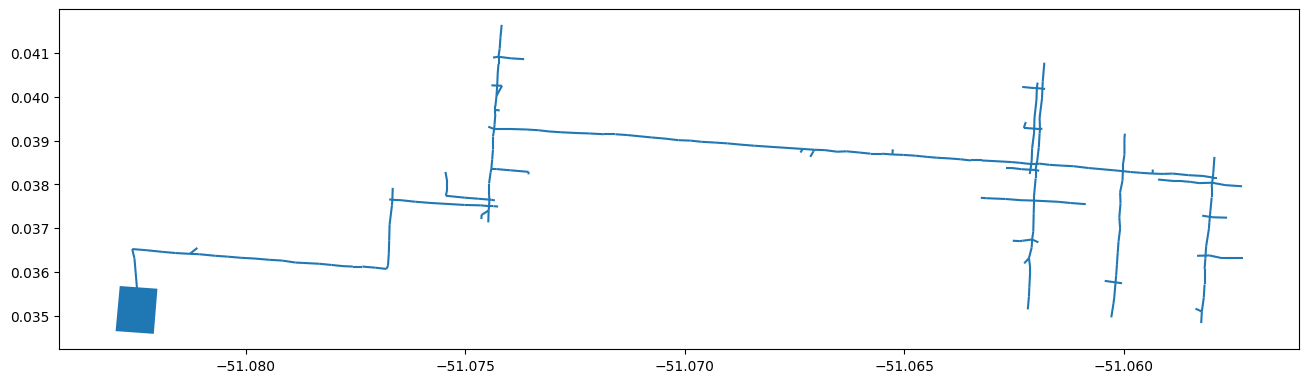

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
#gdf_ssdmt[gdf_ssdmt['CTMT']=='SRT01P8'].plot(ax=ax)
gdf_ssdmt.query("CTMT=='SRT01P8'").plot(ax=ax) # filtra segmentos linha pertencentes ao alimentador 'SRT01P8'
gdf_sub[gdf_sub['COD_ID']=='SRT'].plot(ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
gdf_ssdmt.query("SUB=='SRT'").plot(ax=ax, column='CTMT')
gdf_sub[gdf_sub['COD_ID']=='SRT'].plot(ax=ax)
plt.show()

In [ ]:
gdf_crvcrg

In [ ]:
#gdf_crvcrg[gdf_crvcrg['COD_ID']=='RES-Tipo4']
gdf_crvcrg.query("COD_ID=='RES-Tipo4'")

,COD_ID,DIST,TIP_DIA,POT_01,POT_02,POT_03,POT_04,POT_05,POT_06,POT_07,POT_08,POT_09,POT_10,POT_11,POT_12,POT_13,POT_14,POT_15,POT_16,POT_17,POT_18,POT_19,POT_20,POT_21,POT_22,POT_23,POT_24,POT_25,POT_26,POT_27,POT_28,POT_29,POT_30,POT_31,POT_32,POT_33,POT_34,POT_35,POT_36,POT_37,POT_38,POT_39,POT_40,POT_41,POT_42,POT_43,POT_44,POT_45,POT_46,POT_47,POT_48,POT_49,POT_50,POT_51,POT_52,POT_53,POT_54,POT_55,POT_56,POT_57,POT_58,POT_59,POT_60,POT_61,POT_62,POT_63,POT_64,POT_65,POT_66,POT_67,POT_68,POT_69,POT_70,POT_71,POT_72,POT_73,POT_74,POT_75,POT_76,POT_77,POT_78,POT_79,POT_80,POT_81,POT_82,POT_83,POT_84,POT_85,POT_86,POT_87,POT_88,POT_89,POT_90,POT_91,POT_92,POT_93,POT_94,POT_95,POT_96,DESCR,GRU_TEN
1,RES-Tipo4,31,DO,8259.323998,7901.353066,7933.223076,7917.358849,7888.587792,7619.733665,7392.863334,7255.613456,7307.760307,6608.219443,6926.860618,6671.959876,6991.270988,7131.642387,6934.234275,7066.910148,6928.677482,6982.599540,6555.997351,6869.023154,6579.049094,6596.629828,6894.278648,6512.912223,6586.973441,6294.601553,6109.903494,5850.834066,5509.513311,5393.819646,5055.369497,4910.789891,4663.970753,4018.432087,4297.306034,4297.526402,3740.181385,3553.405155,3750.303684,4133.343418,3165.101260,3941.570515,3094.338000,3260.615375,3791.006901,3429.765079,3402.047321,3864.593510,3554.644794,4514.787373,4639.093526,4583.843114,4935.997441,5330.606832,4912.265157,5131.956243,5525.339346,5053.646016,4768.872212,4878.235356,4935.198888,4808.224019,4766.875691,4866.646001,5498.010915,5956.145514,5829.350470,5763.852453,4578.287953,3490.295906,3487.742042,3920.617559,4480.469689,4709.338784,5301.821496,4625.966988,4980.411374,4918.400121,5663.961874,5722.084268,6385.764365,6324.673804,5952.471689,6409.798045,7716.093027,7508.785928,7263.183452,7340.242443,7930.266243,8571.575845,8352.241524,8738.303536,8205.473061,8257.273034,8141.962975,7469.808738,,BT
40,RES-Tipo4,31,DU,8026.708535,7812.012871,7479.559913,7619.046577,7472.195015,7437.010338,7788.016426,7738.667122,8054.353218,7874.811318,7822.279350,7717.199959,7564.962593,8049.884026,8032.743080,7812.763161,7864.118019,7879.541802,8050.056465,8110.352150,8155.117272,7706.255104,7432.768623,7225.932685,7089.282584,6301.720145,5935.226463,5591.366400,4588.468480,4346.763260,3524.218479,2843.258696,2817.874007,3042.160659,2719.042300,2315.335604,2122.616898,1670.281755,1615.851213,1567.150032,1745.320066,2574.409440,2987.450046,3146.177701,3677.485103,3728.251652,3515.480642,3213.455610,2961.610009,3085.385610,3887.961037,5572.895170,6838.655822,7318.009956,8076.598755,8149.189865,8463.479829,8748.515695,8330.518792,6540.027152,6889.297462,7581.827316,7432.125969,7597.309913,7838.912438,7249.950691,6070.252585,5917.580542,5195.129217,5351.327539,4974.244531,5042.171903,5405.800863,5431.899168,6323.487723,6867.167121,7384.989112,9068.962945,9545.296869,9446.167291,8291.069817,8240.440712,8043.129402,8635.911202,8992.522088,9074.900583,10163.564555,9254.502374,9062.718606,9167.583383,9096.275430,8374.970727,7804.565727,8096.927025,7800.245750,7703.209679,,BT
64,RES-Tipo4,31,SA,7504.733070,8529.214776,8121.840279,8370.350442,8147.801766,8467.258324,8565.170571,8478.326272,8210.619912,8372.629586,8210.594490,8318.956673,8070.846215,7928.475960,8048.163369,7808.435188,7762.114357,8043.778420,7220.705543,7540.342750,7284.817878,7276.975318,7264.636283,7118.090888,6621.900763,5786.534674,5566.181814,5305.825857,4659.728452,5201.373220,4745.152577,4550.064885,4536.632069,4767.001775,4939.849340,4756.817113,4997.995549,5328.892080,5633.639410,4342.072026,3890.238392,3678.796398,4050.335087,5729.277861,6111.386137,6159.607691,6330.515025,5608.770895,5661.690134,4897.436196,5381.286150,5461.753618,6033.762823,5893.604323,5792.008308,5232.139776,4649.543525,4804.279197,5292.019081,5718.736915,5292.967887,6395.142462,6093.361885,5965.318689,5919.923025,6362.466635,6021.683237,5225.632667,5189.838325,4978.778157,4618.934668,4178.797560,3909.273865,4698.059647,5267.322080,5168.469556,5625.099541,

In [ ]:
cols = [f'POT_{i:02d}' for i in range(1,97)]
print(cols)

['POT_01', 'POT_02', 'POT_03', 'POT_04', 'POT_05', 'POT_06', 'POT_07', 'POT_08', 'POT_09', 'POT_10', 'POT_11', 'POT_12', 'POT_13', 'POT_14', 'POT_15', 'POT_16', 'POT_17', 'POT_18', 'POT_19', 'POT_20', 'POT_21', 'POT_22', 'POT_23', 'POT_24', 'POT_25', 'POT_26', 'POT_27', 'POT_28', 'POT_29', 'POT_30', 'POT_31', 'POT_32', 'POT_33', 'POT_34', 'POT_35', 'POT_36', 'POT_37', 'POT_38', 'POT_39', 'POT_40', 'POT_41', 'POT_42', 'POT_43', 'POT_44', 'POT_45', 'POT_46', 'POT_47', 'POT_48', 'POT_49', 'POT_50', 'POT_51', 'POT_52', 'POT_53', 'POT_54', 'POT_55', 'POT_56', 'POT_57', 'POT_58', 'POT_59', 'POT_60', 'POT_61', 'POT_62', 'POT_63', 'POT_64', 'POT_65', 'POT_66', 'POT_67', 'POT_68', 'POT_69', 'POT_70', 'POT_71', 'POT_72', 'POT_73', 'POT_74', 'POT_75', 'POT_76', 'POT_77', 'POT_78', 'POT_79', 'POT_80', 'POT_81', 'POT_82', 'POT_83', 'POT_84', 'POT_85', 'POT_86', 'POT_87', 'POT_88', 'POT_89', 'POT_90', 'POT_91', 'POT_92', 'POT_93', 'POT_94', 'POT_95', 'POT_96']


In [ ]:
gdf_crvcrg.query("TIP_DIA=='DO' and COD_ID=='RES-Tipo4'")[cols]

,POT_01,POT_02,POT_03,POT_04,POT_05,POT_06,POT_07,POT_08,POT_09,POT_10,POT_11,POT_12,POT_13,POT_14,POT_15,POT_16,POT_17,POT_18,POT_19,POT_20,POT_21,POT_22,POT_23,POT_24,POT_25,POT_26,POT_27,POT_28,POT_29,POT_30,POT_31,POT_32,POT_33,POT_34,POT_35,POT_36,POT_37,POT_38,POT_39,POT_40,POT_41,POT_42,POT_43,POT_44,POT_45,POT_46,POT_47,POT_48,POT_49,POT_50,POT_51,POT_52,POT_53,POT_54,POT_55,POT_56,POT_57,POT_58,POT_59,POT_60,POT_61,POT_62,POT_63,POT_64,POT_65,POT_66,POT_67,POT_68,POT_69,POT_70,POT_71,POT_72,POT_73,POT_74,POT_75,POT_76,POT_77,POT_78,POT_79,POT_80,POT_81,POT_82,POT_83,POT_84,POT_85,POT_86,POT_87,POT_88,POT_89,POT_90,POT_91,POT_92,POT_93,POT_94,POT_95,POT_96
1,8259.323998,7901.353066,7933.223076,7917.358849,7888.587792,7619.733665,7392.863334,7255.613456,7307.760307,6608.219443,6926.860618,6671.959876,6991.270988,7131.642387,6934.234275,7066.910148,6928.677482,6982.59954,6555.997351,6869.023154,6579.049094,6596.629828,6894.278648,6512.912223,6586.973441,6294.601553,6109.903494,5850.834066,5509.513311,5393.819646,5055.369497,4910.789891,4663.970753,4018.432087,4297.306034,4297.526402,3740.181385,3553.405155,3750.303684,4133.343418,3165.10126,3941.570515,3094.338,3260.615375,3791.006901,3429.765079,3402.047321,3864.59351,3554.644794,4514.787373,4639.093526,4583.843114,4935.997441,5330.606832,4912.265157,5131.956243,5525.339346,5053.646016,4768.872212,4878.235356,4935.198888,4808.224019,4766.875691,4866.646001,5498.010915,5956.145514,5829.35047,5763.852453,4578.287953,3490.295906,3487.742042,3920.617559,4480.469689,4709.338784,5301.821496,4625.966988,4980.411374,4918.400121,5663.961874,5722.084268,6385.764365,6324.673804,5952.471689,6409.798045,7716.093027,7508.785928,7263.183452,7340.242443,7930.266243,8571.575845,8352.241524,8738.303536,8205.473061,8257.273034,8141.962975,7469.808738


In [ ]:
cols = [f'POT_{i:02d}' for i in range(1,97)]
p_do = gdf_crvcrg.query("TIP_DIA=='DO' and COD_ID=='RES-Tipo4'")[cols].values[0,:]
p_du = gdf_crvcrg.query("TIP_DIA=='DU' and COD_ID=='RES-Tipo4'")[cols].values[0,:]
p_sa = gdf_crvcrg.query("TIP_DIA=='SA' and COD_ID=='RES-Tipo4'")[cols].values[0,:]

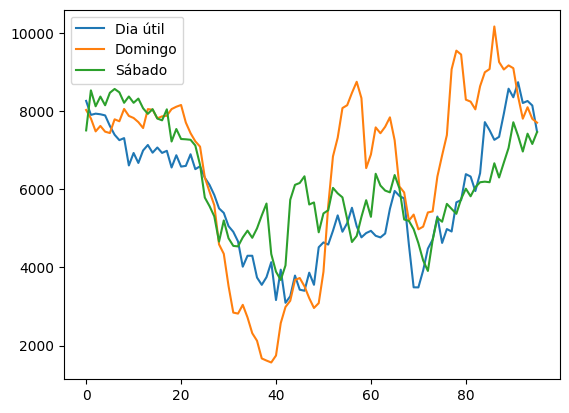

In [ ]:
plt.plot(p_do, label='Dia útil')
plt.plot(p_du, label='Domingo')
plt.plot(p_sa, label='Sábado')
plt.legend()

In [ ]:
num_se = gdf_sub['COD_ID'].count()
se_list = gdf_sub['COD_ID'].tolist()

Calcula a quantidade de alimentadores por subestação

In [ ]:
gdf_ctmt.groupby('SUB')['COD_ID'].count().reset_index()

,SUB,COD_ID
0,AMP,1
1,CAL,1
2,CPX,3
3,CY,2
4,CY1,1
5,EQT,13
6,JAR,4
7,MCP,11
8,NAV,5
9,OYP,4


In [ ]:
gdf_ssdmt.query("FAS_CON=='A' or FAS_CON=='B' or FAS_CON=='C'").groupby(['SUB', 'CTMT', 'TIP_INST'])['COD_ID'].count()

SUB  CTMT     TIP_INST  
AMP  AMP01Y2  RD_AER_RUR    1425
              RD_AER_URB      23
APO  TAG01Y1  RD_AER_RUR     448
CAL  CAL01C1  RD_AER_RUR    1174
              RD_AER_URB      29
                            ... 
TAG  TAG01Y1  RD_AER_URB      88
     TAG01Y2  RD_AER_RUR    1240
              RD_AER_URB      86
TRV  CAL01C1  RD_AER_RUR     289
              RD_AER_URB       9
Name: COD_ID, Length: 97, dtype: int64

In [ ]:
gdf_ssdmt.query("FAS_CON=='A' or FAS_CON=='B' or FAS_CON=='C'")['CTMT'].unique()

array(['NAV01N1', 'CAL01C1', 'EQT01C7', 'MCP01W4', 'STN01W3', 'STN01S6',
       'CY109F1', 'TAG01Y2', 'STN01S3', 'MCP01W3', 'SRT01F2', 'CY01C3',
       'SRT01P3', 'CPX01C1', 'OYP01Y2', 'CPX01C3', 'AMP01Y2', 'CPX01C2',
       'TAG01Y1', 'OYP01Y4', 'EQT01C1', 'OYP01Y3', 'EQT01Y1', 'JAR01F2',
       'MCP01C5', 'EQT01Y6', 'EQT01Y5', 'EQT01C8', 'MCP01C4', 'MCP01C1',
       'MCP01C2', 'MCP01W2', 'NAV01N3', 'STN01S7', 'POR01V2', 'NAV01N2',
       'STN01S5', 'EQT01C2', 'EQT01Y2', 'EQT01C4', 'EQT01Y4', 'STN01S4',
       'POR01V3', 'JAR01F1', 'MCP01C7', 'SRT01F5', 'SRT01P9', 'JAR01F3',
       'STN01S8', 'STN01S9', 'SRT01P2', 'SJO01S4', 'SJO01S5', 'STN01S2',
       'SRT01P5', 'STN01W1', 'STN01W2'], dtype=object)

In [ ]:
gdf_ssdmt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
#gdf = gdf_ssdmt.query("CTMT=='POR01V1'")
gdf = gdf_ssdmt.query("SUB=='POR'")